In [2]:
import tensorflow as tf 
import numpy as np
import csv 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import decomposition
from sklearn import datasets

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
largo, largo_imagen, alto_imagen = train_images.shape

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
text_labels = []
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
for i in np.arange(np.size(train_labels)):
  text_labels.append(labels[train_labels[i]])

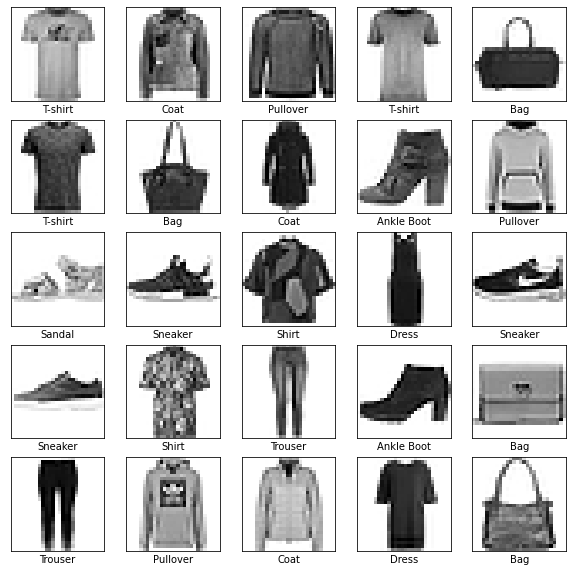

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(text_labels[img_index])

In [6]:
imagenes = []
for x in np.arange(largo):
  imagenes.append(train_images[x].reshape(1,largo_imagen*alto_imagen))
varianza = np.var(imagenes, axis = 0)
mask = np.where(varianza == 0)
filtro = mask[1]
imagenes_filtradas = []
for y in np.arange(largo):
  imagenes_filtradas.append(np.delete(imagenes[y], filtro, axis = 1))
ancho_imagen_filtrada = np.shape(imagenes_filtradas)[2]

sigma = np.std(imagenes_filtradas, axis = 0)
mu = np.mean(imagenes_filtradas, axis = 0)
imagenes_filtradas = (imagenes_filtradas - mu)/sigma   
imagenes_filtradas = imagenes_filtradas.reshape(largo,ancho_imagen_filtrada) 

In [8]:
sigma = np.std(imagenes_filtradas, axis = 0)
mu = np.mean(imagenes_filtradas, axis = 0)
imagenes_filtradas = (imagenes_filtradas - mu)/sigma   
imagenes_filtradas = imagenes_filtradas.reshape(largo,ancho_imagen_filtrada)      

In [9]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(10, input_dim=ancho_imagen_filtrada)) #dense(numero de clases a clasificar, dimension del input)
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model.fit(x= imagenes_filtradas, y= train_labels, batch_size = largo, epochs=2000, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 4s 4s/step - loss: 3.0142 - accuracy: 0.1213
Epoch 2/2000
1/1 [==============================] - 0s 81ms/step - loss: 2.7334 - accuracy: 0.1424
Epoch 3/2000
1/1 [==============================] - 0s 116ms/step - loss: 2.4953 - accuracy: 0.1774
Epoch 4/2000
1/1 [==============================] - 0s 90ms/step - loss: 2.2951 - accuracy: 0.2311
Epoch 5/2000
1/1 [==============================] - 0s 78ms/step - loss: 2.1281 - accuracy: 0.2932
Epoch 6/2000
1/1 [==============================] - 0s 75ms/step - loss: 1.9891 - accura

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.71      0.72      1000
           3       0.82      0.86      0.84      1000
           4       0.71      0.76      0.73      1000
           5       0.91      0.89      0.90      1000
           6       0.62      0.54      0.58      1000
           7       0.88      0.91      0.90      1000
           8       0.93      0.93      0.93      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



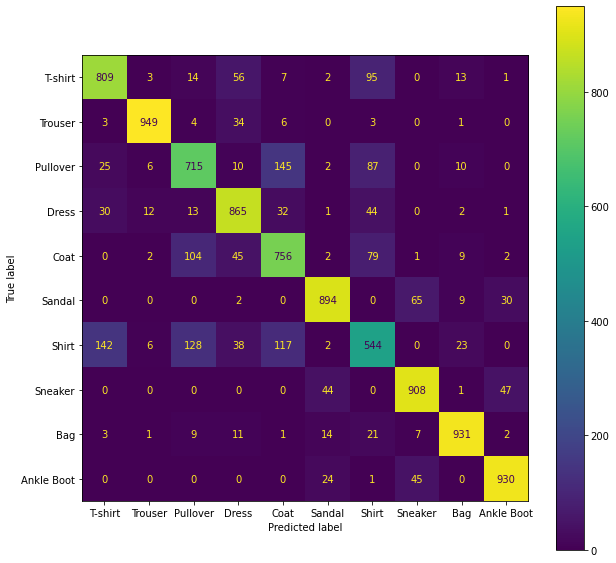

In [41]:
def test_images_normalized(train_images, filter):
  imagenes = []
  largo = np.shape(train_images)[0]
  ancho = np.shape(train_images)[1]
  alto = np.shape(train_images)[2]
  for x in np.arange(largo):
    imagenes.append(train_images[x].reshape(1,ancho*alto))
  
  imagenes_filtradas = []
  for y in np.arange(largo):
    imagenes_filtradas.append(np.delete(imagenes[y], filter, axis = 1))
  sigma = np.std(imagenes_filtradas, axis = 0)
  mu = np.mean(imagenes_filtradas, axis = 0)
  imagenes_filtradas = (imagenes_filtradas - mu)/sigma
  largo = np.shape(imagenes_filtradas)[0]
  ancho = np.shape(imagenes_filtradas)[2]   
  imagenes_filtradas = imagenes_filtradas.reshape(largo,ancho)
  np.nan_to_num(imagenes_filtradas, copy=False, nan=0.0)
  return imagenes_filtradas 

imagenes_prueba = test_images_normalized(test_images, filtro)
valores_estimados = model.predict(imagenes_prueba)

resultados_estimados = []
largo = np.shape(valores_estimados)[0]
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(test_labels,resultados_estimados)
